In [52]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pylab as plt
import re
import numpy as np

In [109]:
df_pred = pd.read_csv('../data/massbank-data/accuracy_summary_per_mech_pred_MolFps.csv')
df_pred.head(20)
df_pred.acc_med = round(df_pred.acc_med, 2)
df_pred.error_med = round(df_pred.error_med, 2)
df_pred.cohen_med = round(df_pred.cohen_med, 2)
df_pred.acc_mean = round(df_pred.acc_mean, 2)
df_pred.error_mean = round(df_pred.error_mean, 2)
df_pred.cohen_mean = round(df_pred.cohen_mean, 2)
df_pred.acc_max = round(df_pred.acc_max, 2)
df_pred.error_max = round(df_pred.error_max, 2)
df_pred.cohen_max = round(df_pred.cohen_max, 2)

def capital_words_spaces(str1):
  return re.sub(r"(\w)([A-Z])", r"\1 \2", str1)
df_pred.mech = df_pred.mech.apply(capital_words_spaces)

df_pred['mech'] = df_pred['mech'].str.replace('D NA','DNA')

df_pred['type'] = "Pred"
print(df_pred['mech'])
df_pred.head(3)
df_pred.shape
df_pred['acc_mean'] = df_pred['acc_mean'] - 0.01

0     Androgen Metabolic Process
1             Angiogenic Process
2             Aromatase Activity
3                     Cell Cycle
4             Cell Death Process
5         Cell Viability Process
6                     DNA Damage
7      Energy Metabolism Process
8     Estrogen Metabolic Process
9           Extracellular Matrix
10    Gene Expression Regulation
11          Histone Modification
12         Inflammatory Response
13       Other Neurotransmission
14    Thyroid Hormone Generation
Name: mech, dtype: object


In [111]:
df_true = pd.read_csv('../data/massbank-data/accuracy_summary_per_mech_true_MolFps.csv')
df_true.acc_med = round(df_true.acc_med, 2)
df_true.error_med = round(df_true.error_med, 2)
df_true.cohen_med = round(df_true.cohen_med, 2)
df_true.acc_mean = round(df_true.acc_mean, 2)
df_true.error_mean = round(df_true.error_mean, 2)
df_true.cohen_mean = round(df_true.cohen_mean, 2)
df_true.acc_max = round(df_true.acc_max, 2)
df_true.error_max = round(df_true.error_max, 2)
df_true.cohen_max = round(df_true.cohen_max, 2)
df_true['mech'] = df_true['mech'].str.replace("X GBoost Trees-", "")
df_true['mech'] = df_true['mech'].str.replace("XGBoostTrees-", "")

def capital_words_spaces(str1):
  return re.sub(r"(\w)([A-Z])", r"\1 \2", str1)
df_true.mech = df_true.mech.apply(capital_words_spaces)

df_true['mech'] = df_true['mech'].str.replace('D NA','DNA')
df_true['type'] = "True"
print(df_true['mech'])
df_true.head(3)
df_true.shape

0           Abnormal Growthand Differentiation
1     Acetylcholine Receptor Signaling Pathway
2        Adrenergic Receptor Signaling Pathway
3                   Androgen Metabolic Process
4                           Angiogenic Process
5                           Aromatase Activity
6                                   Cell Cycle
7                           Cell Death Process
8                       Cell Viability Process
9                                   DNA Damage
10                   Energy Metabolism Process
11                  Estrogen Metabolic Process
12                        Extracellular Matrix
13                  Gene Expression Regulation
14                        Histone Modification
15                       Inflammatory Response
16                     Other Neurotransmission
17                  Thyroid Hormone Generation
Name: mech, dtype: object


(18, 12)

In [112]:
frames = [df_true, df_pred]
df_fps = pd.concat(frames)
df_fps.head()
mechs_to_replace = {'Abnormal Growthand Differentiation':'AGD',
       'Acetylcholine Receptor Signaling Pathway':'ACh-RCP',
       'Adrenergic Receptor Signaling Pathway':'ARD-RSP',
       'Androgen Metabolic Process':'AR-MP',
       'Angiogenic Process':'ANG-P',
       'Aromatase Activity':'ARO-A', 'Cell Cycle':'CC', 'Cell Death Process':'CDP',
       'Cell Viability Process':'CSV', 'DNA Damage':'DNA-D',
       'Energy Metabolism Process':'EN-MP', 'Estrogen Metabolic Process':'ER-MP',
       'Extracellular Matrix':'EM', 'Gene Expression Regulation':'GER',
       'Histone Modification':'HM', 'Inflammatory Response':'IR',
       'Other Neurotransmission':'NT', 'Thyroid Hormone Generation':'ThR-HG'}
df_fps['mechT'] = df_fps['mech'].map(mechs_to_replace)

In [86]:
df_fps.mech.unique()
df_fps.mechT.unique()
df_fps.head(3)

,mech,acc_mean,error_mean,cohen_mean,acc_max,error_max,cohen_max,acc_med,error_med,cohen_med,dtxsid,type,mechT,acc_mean_corr
0,Abnormal Growthand Differentiation,0.62,0.38,0.10,0.62,0.38,0.10,0.62,0.38,0.10,322,True,AGD,0.52
1,Acetylcholine Receptor Signaling Pathway,0.57,0.43,0.10,0.57,0.43,0.10,0.57,0.43,0.10,127,True,ACh-RCP,0.47
2,Adrenergic Receptor Signaling Pathway,0.61,0.39,0.11,0.61,0.39,0.11,0.61,0.39,0.11,109,True,ARD-RSP,0.51


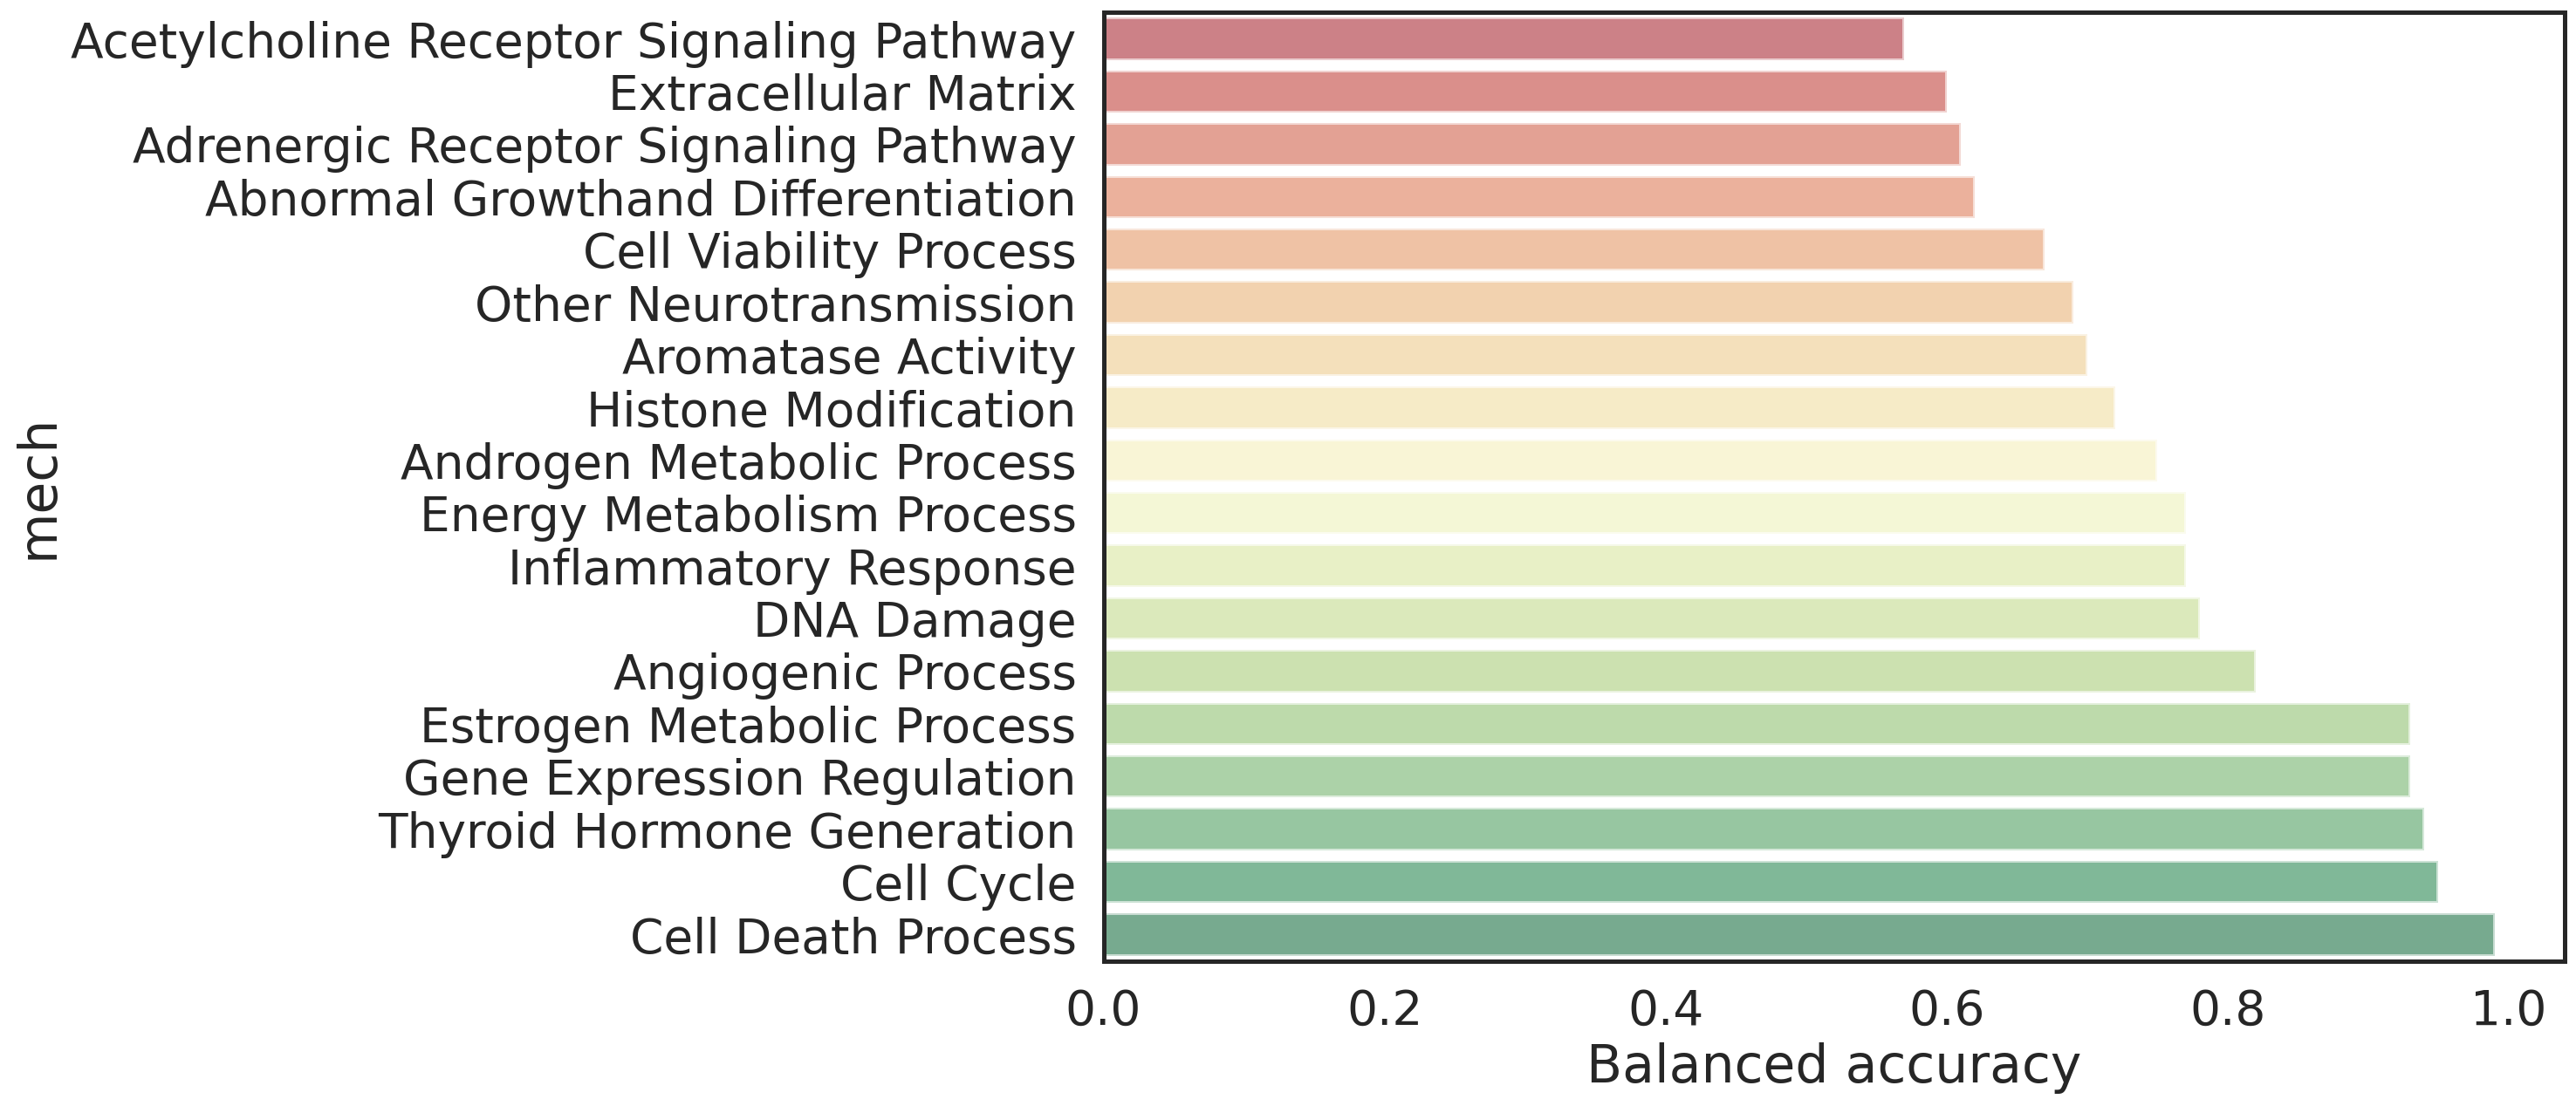

In [34]:
df = df_true
%config InlineBackend.figure_format = 'retina'
sns.set(font_scale = 2)
sns.set_style("white")
rc = {'figure.figsize':(15,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      'font.size' : 22}
plt.rcParams.update(rc)

sns.set_theme(style="whitegrid")
sns.set_style("white")
sns.set_context("poster", font_scale = 1.05, rc={"grid.linewidth": 0.6})
df.sort_values(by=['acc_max'], inplace=True)

sns.set_theme(style="whitegrid")
sns.set_style("white")
sns.set_context("poster", font_scale = 1.25, rc={"grid.linewidth": 0.6})

# Draw a nested barplot by species and sex
h = sns.barplot(
    data=df, 
    x="acc_max", y="mech", alpha=.6, palette = "RdYlGn")
h.set_xlabel("Balanced accuracy")
sns.set(rc={'figure.figsize':(24,12)})
plt.savefig('../plots/massbank/bal-accu-massbank-valid_trueMolFps.png', bbox_inches = 'tight')

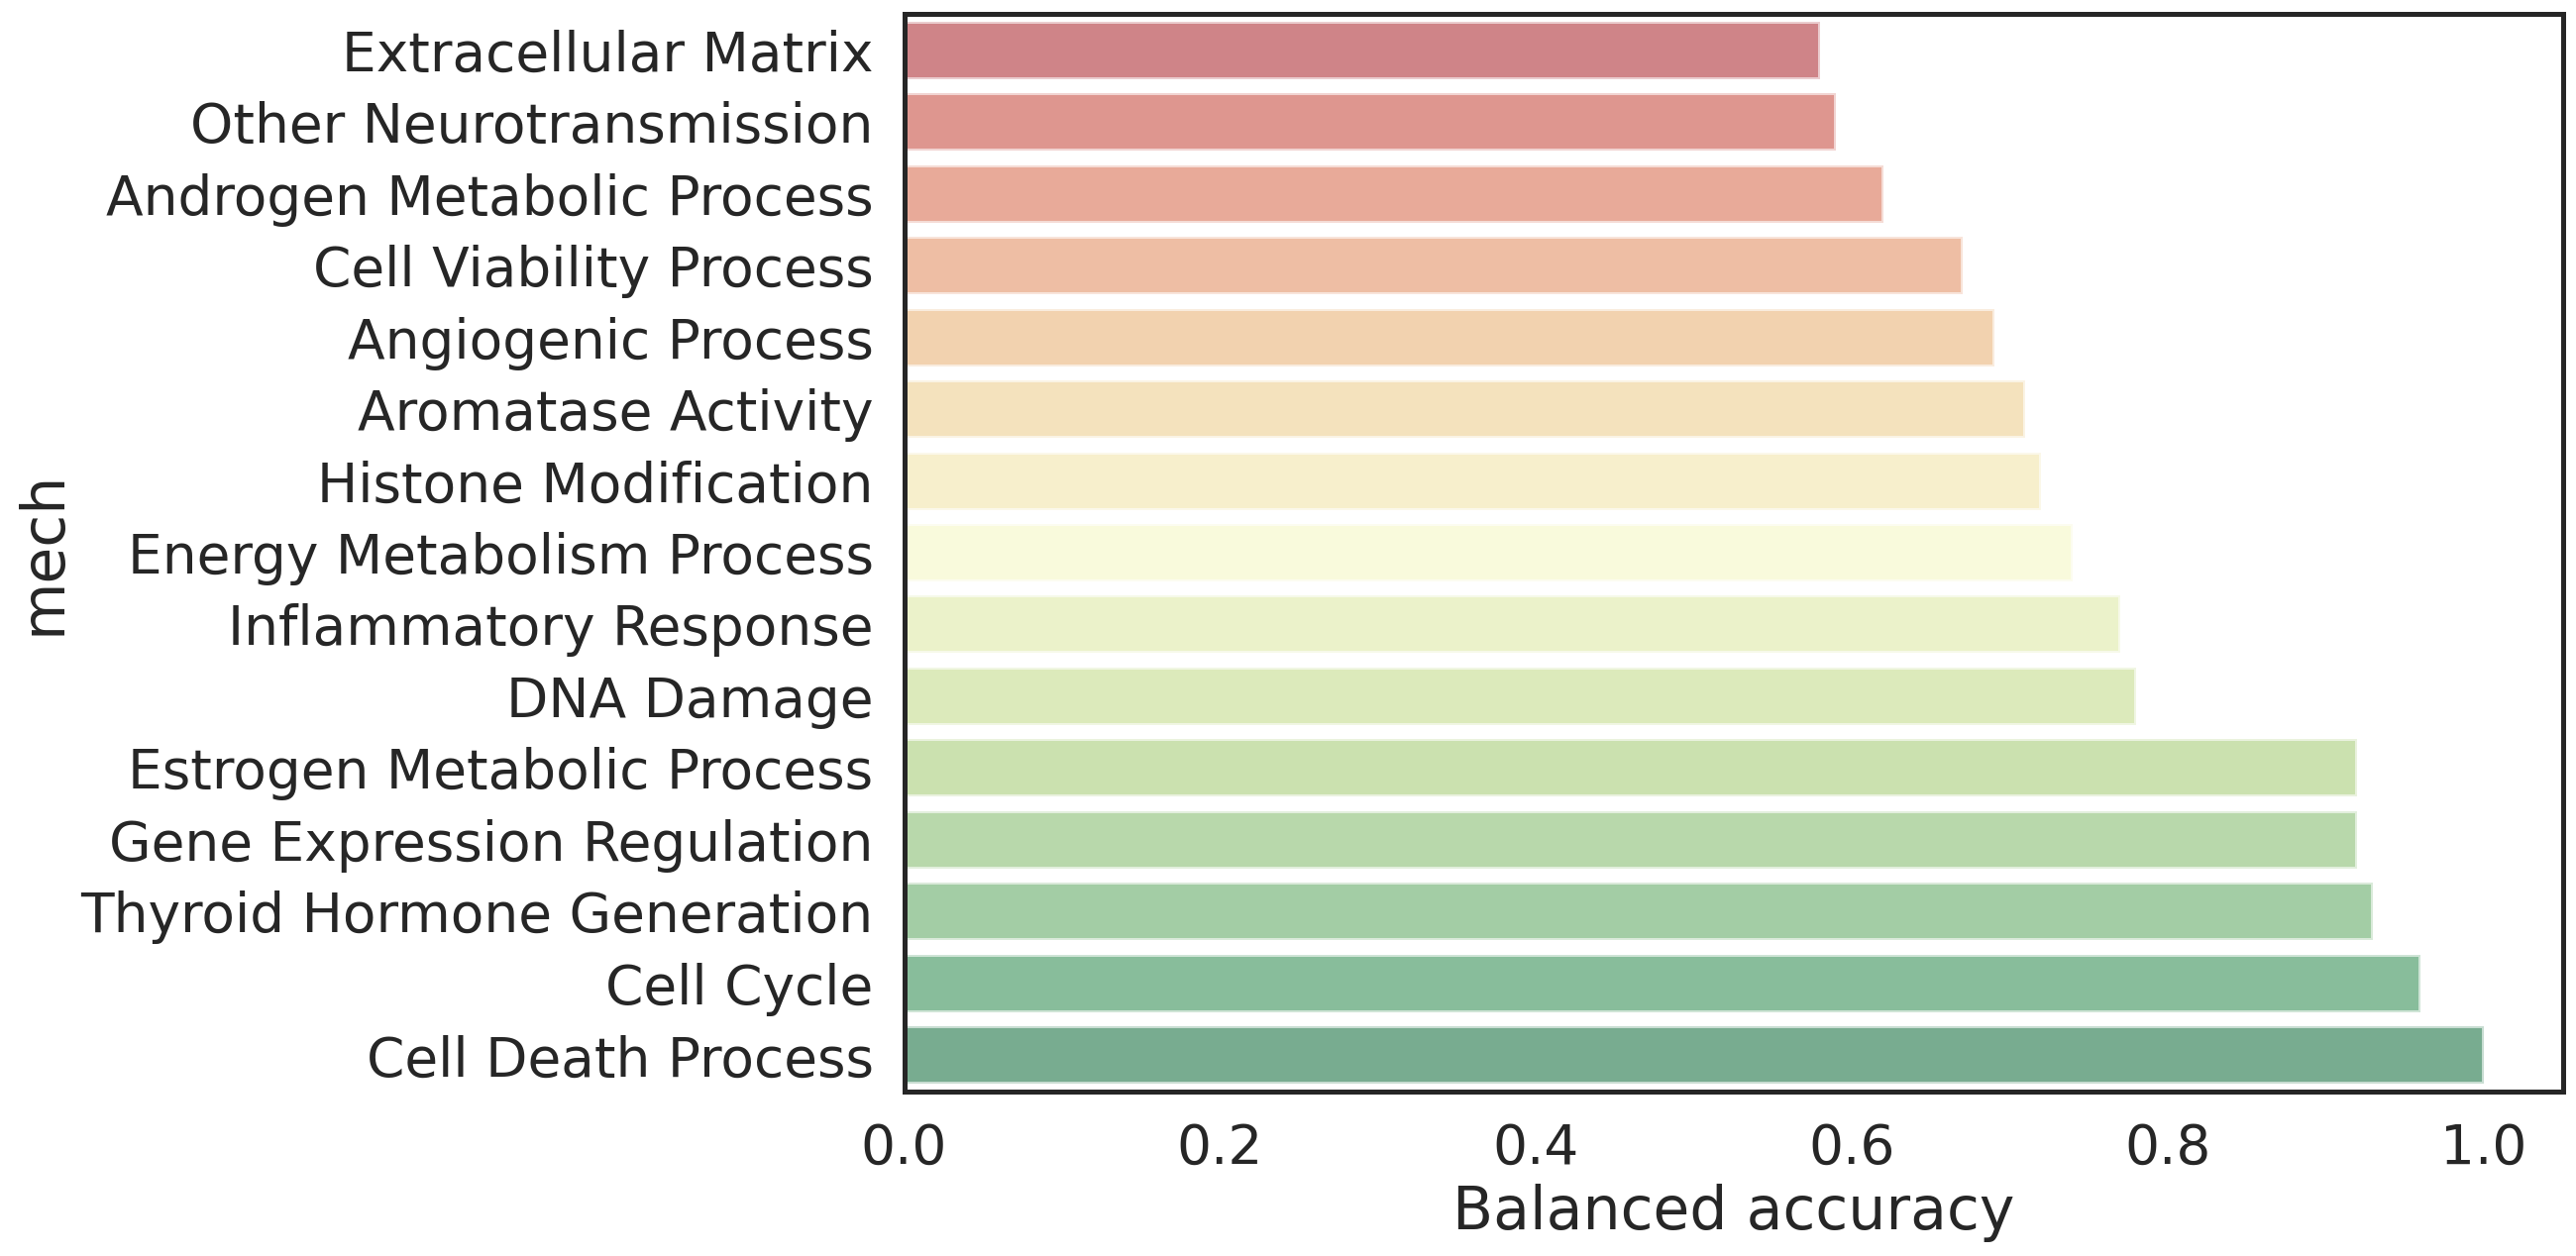

In [33]:
df = df_pred
%config InlineBackend.figure_format = 'retina'
sns.set(font_scale = 2)
sns.set_style("white")
rc = {'figure.figsize':(15,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      'font.size' : 22}
plt.rcParams.update(rc)

sns.set_theme(style="whitegrid")
sns.set_style("white")
sns.set_context("poster", font_scale = 1.05, rc={"grid.linewidth": 0.6})
df.sort_values(by=['acc_max'], inplace=True)

sns.set_theme(style="whitegrid")
sns.set_style("white")
sns.set_context("poster", font_scale = 1.25, rc={"grid.linewidth": 0.6})

# Draw a nested barplot by species and sex
h = sns.barplot(
    data=df, 
    x="acc_max", y="mech", alpha=.6, palette = "RdYlGn")
h.set_xlabel("Balanced accuracy")
sns.set(rc={'figure.figsize':(24,12)})
plt.savefig('../plots/massbank/bal-accu-massbank-valid_predMolFps.png', bbox_inches = 'tight')

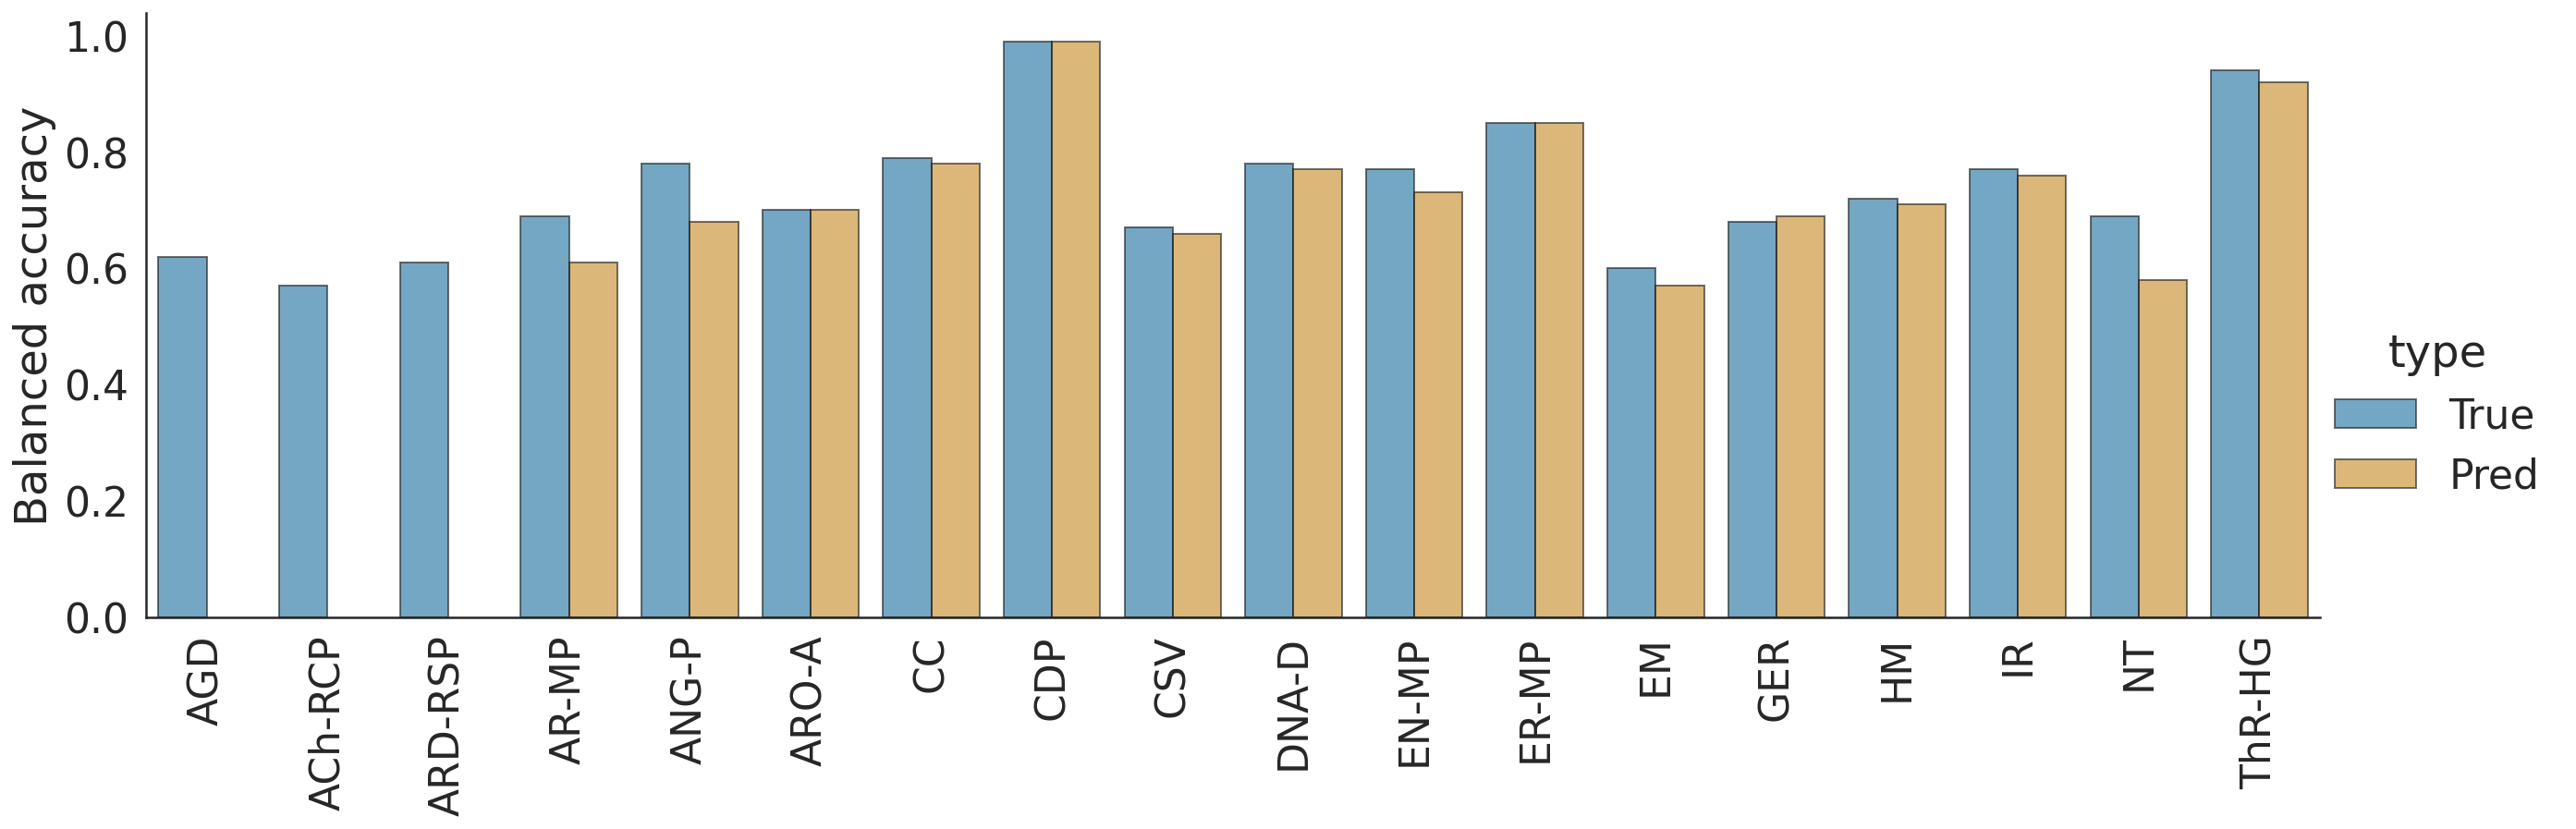

In [113]:
palettef = {"True":"#8ecf67",
           "Pred":"#de402e"}
%config InlineBackend.figure_format = 'retina'
sns.set(font_scale = 2)
sns.set_style("white")
rc = {'figure.figsize':(22,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      'font.size' : 22}
plt.rcParams.update(rc)
%config InlineBackend.figure_format = 'retina'
g = sns.catplot(
    data=df_fps, kind="bar",
    x="mechT", y="acc_mean", hue="type", 
    palette='colorblind', alpha=.6, height=6, aspect = 3, edgecolor="k")
ax = g.facet_axis(0, 0)
plt.xticks(rotation=90)
g.set_axis_labels("", "Balanced accuracy")
plt.savefig('../plots/massbank/cat_massbank_predtrue_fpssummary.svg', bbox_inches = 'tight', dpi = 300)

In [108]:
df_fps.head(100)

,mech,acc_mean,error_mean,cohen_mean,acc_max,error_max,cohen_max,acc_med,error_med,cohen_med,dtxsid,type,mechT
0,Abnormal Growthand Differentiation,0.62,0.38,0.10,0.62,0.38,0.10,0.62,0.38,0.10,322,True,AGD
1,Acetylcholine Receptor Signaling Pathway,0.57,0.43,0.10,0.57,0.43,0.10,0.57,0.43,0.10,127,True,ACh-RCP
2,Adrenergic Receptor Signaling Pathway,0.61,0.39,0.11,0.61,0.39,0.11,0.61,0.39,0.11,109,True,ARD-RSP
3,Androgen Metabolic Process,0.69,0.31,0.28,0.75,0.37,0.31,0.69,0.31,0.28,1227,True,AR-MP
4,Angiogenic Process,0.78,0.22,0.56,0.82,0.26,0.64,0.78,0.22,0.56,470,True,ANG-P
5,Aromatase Activity,0.70,0.30,0.34,0.70,0.30,0.34,0.70,0.30,0.34,651,True,ARO-A
6,Cell Cycle,0.79,0.21,0.10,0.95,0.41,0.21,0.82,0.18,0.13,2658,True,CC
7,Cell Death Process,0.99,0.01,0.00,0.99,0.01,0.00,0.99,0.01,0.00,565,True,CDP
8,Cell Viability Process,0.67,0.33,0.29,0.67,0.33,0.29,0.67,0.33,0.29,684,True,CSV
9,DNA Damage,0.78,0.22,0.53,0.78,0.22,0.53,0.78,0.22,0.53,976,True,DNA-D
